# **Task-2:Color Identification in Images **

*GRIP : The Sparks Foundation *



**Author -Ishan Ayus**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/GRIP/

/content/drive/MyDrive/GRIP


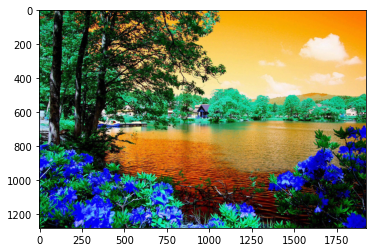

In [ ]:
img = cv2.imread('abc_new.jpg')
plt.imshow(img)

In [ ]:
np.shape(img)

(1280, 1920, 3)

In [ ]:
img.dtype

dtype('uint8')

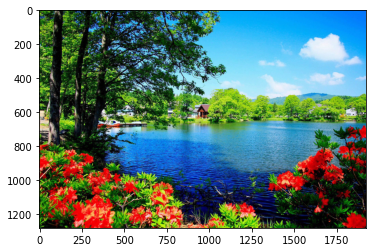

In [ ]:
#converting an image from one color space to another
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x} {:02x}{:02x}".format(int(color[0]), int(color[1]),int(color[2]))

In [ ]:
#reshape to flattened array
img = image.reshape((image.shape[0] * image.shape[1], 3))

In [ ]:
#no. of dominant colors
n_clusters = 8

** KMeans Algorithm **

In [ ]:
clus = KMeans(n_clusters)
clus.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
colors = clus.cluster_centers_
colors

array([[162.38319835, 186.57726737,  66.91884607],
       [ 13.62378451,  28.13482443,  17.73726603],
       [ 89.24849216, 176.63744029, 216.79069616],
       [ 30.92911923,  81.94413416, 144.25437102],
       [209.64947678,  26.5444978 ,  18.92197654],
       [ 64.46057812, 117.16716991,  32.92699368],
       [173.34605341, 222.34154495, 242.47398133],
       [ 16.9627888 , 152.60061101, 241.30671188]])

In [ ]:
labels = clus.labels_
labels
# count of pixels
counts = Counter(labels)
counts

Counter({0: 239406,
         1: 756525,
         2: 291699,
         3: 194256,
         4: 167436,
         5: 287979,
         6: 282441,
         7: 237858})

In [ ]:
#sorts the counts
sorts = sorted(counts.items())
sorts

[(0, 239406),
 (1, 756525),
 (2, 291699),
 (3, 194256),
 (4, 167436),
 (5, 287979),
 (6, 282441),
 (7, 237858)]

In [ ]:
#creates dictionary
counts = dict(sorts)
counts

{0: 239406,
 1: 756525,
 2: 291699,
 3: 194256,
 4: 167436,
 5: 287979,
 6: 282441,
 7: 237858}

In [ ]:
order_color=[colors[i] for i in counts.keys()]
hex_color=[RGB2HEX(order_color[i]) for i in counts.keys()]

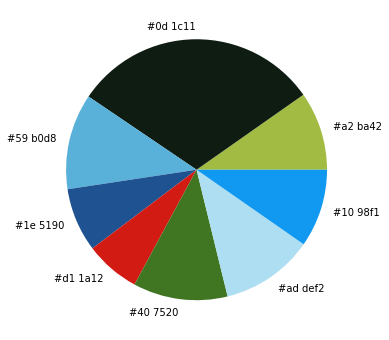

In [ ]:
#piechart for dominating colors
 
fig = plt.figure(figsize = (12, 6))
plt.pie(counts.values(), labels = hex_color, colors = np.array(colors/255))
plt.show()